# High-dimensional Outlier Detection - Introduction

This notebook is all about the paper by Beyer et al. [1] and, i.e. their Theorem 1 that
formalized the problem of nearest neighbor based outlier detection in high-dimensional 
outlier detection settings. Some notation and inspiration also comes from the very good tutorial of 
Zimek et al. [2] and their corresponding survey paper [3].

##### Glossary
- $\mathbf{D}^{dims}$ : distances between samples from the data distribution and samples from the query distribution, both have dimensionality _dims_ (vector)
- $D_{max} = \max_i \mathbf{D}^{dims}_i$ : maximum distance in the set of all distances (scalar, similar with $D_{min}$)
- $\mathbf{X}^{dims}$ : sample from the data distribution having dimensionality _dims_
- $P$ : is a probability
- $\mathbf{E[X]}$ : is the expectation of X over some probability
- $var(X)$: equal to $\mathbf{E}[(X-\mathbf{E}[X])^2] = \mathbf{E}[X^2] - \mathbf{E}[X]^2$

##### References
[1] K. Beyer, J. Goldstein, R. Ramakrishnan, and U. Shaft, “When Is ‘Nearest Neighbor’ Meaningful?,” in International conference on database theory (ICDT), 1999, pp. 217–235.

[2] A. Zimek, E. Schubert, and H.-P. Kriegel, “A survey on unsupervised outlier detection in high-dimensional numerical data,” Statistical Analysis and Data Mining, vol. 5, no. 5. pp. 363–387, 2012.

[3] A. Zimek, E. Schubert, and H.-P. Kriegel, “Tutorial on Outlier Detection for High-dimensional Data,” 2013.

##### Supplement
Normalization of distances is done by multiplying $1/\sqrt{dims}$ (for $\ell^p$-norms $1/\sqrt[p]{dims}$) since the maximum distance in the unit cube is $\sqrt{dims} = \sqrt{\sum_d 1^2}$ for euclidean metrics.

In [24]:
%matplotlib inline
import numpy as np
import scipy.spatial.distance as dist
import matplotlib.pyplot as plt

### First Try: Empirical Verification

The main insight of Theorem 1 in [1] is that as the dimensionality of data sets increases, the distance between 
some query point and to its nearest neighbor $D_{min}$ and its furthest neighbor $D_{max}$ will converge to the same value. That means $lim_{dims \rightarrow \infty}\; P\left( \frac{D_{max}}{D_{min}} - 1\leq \epsilon \right) = 1$ for any $\epsilon > 0$.

Lets check empirically in a standard (toy) setting if that is correct. Therefore, we are generating some Gaussian random data points (various cluster with random means and variance) with increasing dimensionality and uniformly distributed query points. Further, we will check for 3 distinct $\ell^p$-norm induced distance metrics (manhattan, euclidean and max norm).

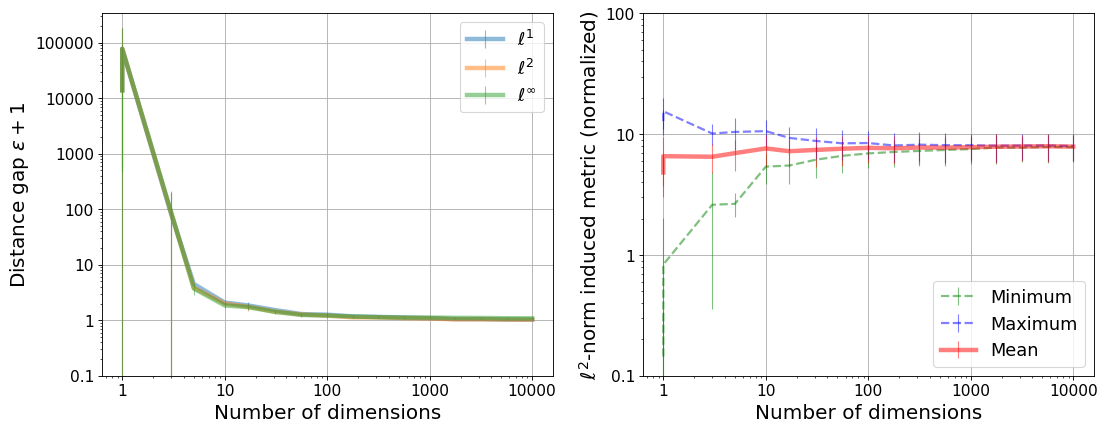

In [25]:
DIMS = np.logspace(0, 4, 17, dtype=np.int)
REPS = 3
CLUSTER = 3
res = np.zeros((REPS, len(DIMS), 3))
extremas = np.zeros((REPS, len(DIMS), 3))
for r in range(REPS):
    rndm_var = np.random.rand()
    rndm_mean = 10.*np.random.randn()
    for d in range(len(DIMS)):
        X_data = np.empty((DIMS[d], 0))
        for c in range(CLUSTER):
            X_data = np.append(X_data, rndm_var*np.random.randn(DIMS[d], np.int(1000/CLUSTER)) + rndm_mean, axis=1)
        X_query = (np.random.rand(DIMS[d], 10)-0.5) * 2. * 2 * np.max(np.abs(X_data))
        # ok, lets measure the distance gap for various metrics
        D = dist.cdist(X_data.T, X_query.T, metric='minkowski', p=1)
        res[r, d, 0] = np.max(D)/np.min(D)
        D = dist.cdist(X_data.T, X_query.T, metric='minkowski', p=2)
        res[r, d, 1] = np.max(D)/np.min(D)
        # ..and store the euclidean min, max, mean values
        extremas[r, d, 0] = np.min(D) * 1./np.sqrt(DIMS[d])
        extremas[r, d, 1] = np.max(D) * 1./np.sqrt(DIMS[d])
        extremas[r, d, 2] = np.mean(D) * 1./np.sqrt(DIMS[d])
        D = dist.cdist(X_data.T, X_query.T, metric='chebyshev')
        res[r, d, 2] = np.max(D)/np.min(D)

plt.figure(figsize=(16, 6), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(1, 2, 1)
plt.errorbar(DIMS, np.mean(res[:,:,0], axis=0), np.std(res[:,:,0], axis=0), alpha=0.5, linewidth=4, elinewidth=1)
plt.errorbar(DIMS, np.mean(res[:,:,1], axis=0), np.std(res[:,:,1], axis=0), alpha=0.5, linewidth=4, elinewidth=1)
plt.errorbar(DIMS, np.mean(res[:,:,2], axis=0), np.std(res[:,:,2], axis=0), alpha=0.5, linewidth=4, elinewidth=1)
plt.loglog()
plt.grid()
plt.xticks([1, 10, 100, 1000, 10000], [1, 10, 100, 1000, 10000], fontsize=14)
plt.yticks([0.1, 1, 10, 100, 1000, 10000, 100000], [0.1, 1, 10, 100, 1000, 10000, 100000], fontsize=14)
plt.xlabel('Number of dimensions', fontsize=18)
plt.ylabel('Distance gap $\epsilon + 1$', fontsize=18)
plt.legend(['$\ell^1$', '$\ell^2$', '$\ell^\infty$'], fontsize=16)

plt.subplot(1, 2, 2)
plt.errorbar(DIMS, np.mean(extremas[:,:,0], axis=0), np.std(extremas[:,:,0], axis=0), fmt='--g', alpha=0.5, linewidth=2, elinewidth=1)
plt.errorbar(DIMS, np.mean(extremas[:,:,1], axis=0), np.std(extremas[:,:,1], axis=0), fmt='--b', alpha=0.5, linewidth=2, elinewidth=1)
plt.errorbar(DIMS, np.mean(extremas[:,:,2], axis=0), np.std(extremas[:,:,2], axis=0), fmt='-r', alpha=0.5, linewidth=4, elinewidth=1)
plt.loglog()
plt.grid()
plt.xticks([1, 10, 100, 1000, 10000], [1, 10, 100, 1000, 10000], fontsize=14)
plt.yticks([0.1, 1, 10, 100], [0.1, 1, 10, 100], fontsize=14)
plt.xlabel('Number of dimensions', fontsize=18)
plt.ylabel('$\ell^2$-norm induced metric (normalized)', fontsize=18)
plt.legend(['Minimum', 'Maximum', 'Mean'], loc=4, fontsize=16) 

plt.savefig('ad_high_dim_results.pdf')

### Analysis

Well, the results seem to support the theory (nice!). However, this was only one part of the whole story. The other part states that the result only holds if the data behaves a certain way. Basically, Theorem 1 by Beyer et al. [1] states that if $\;lim_{dims \rightarrow \infty}\; var \left( \frac{(\mathbf{D}^{dims})^p}{\mathbf{E}[(\mathbf{D}^{dims})^p]} \right) = 0$ (actually, it does also include higher-order moments $0 < p < \infty$) then we can expect that the distances will concentrate.

First things first, the original formulation of the theorem relied on distances $\mathbf{D}$ between a query point and sample points from the data distribution. This, however, can be simplified by just using norms of the samples from the data distribution. Furthermore, any distance will be either zero or positive and hence, by taking the $p$-th power will not change the theorem result. Therefore we can rewrite the whole theorem:

Assume that $lim_{dims \rightarrow \infty}\; var \left( \frac{\Vert \mathbf{X}^{dims}\Vert}{\mathbf{E}[\Vert\mathbf{X}^{dims}\Vert]} \right) = 0$, then $lim_{dims \rightarrow \infty}\; P\left( \frac{D_{max}}{D_{min}} - 1\leq \epsilon \right) = 1$ for any $\epsilon > 0$.

Lets plot if the assumption is met by the previous example.

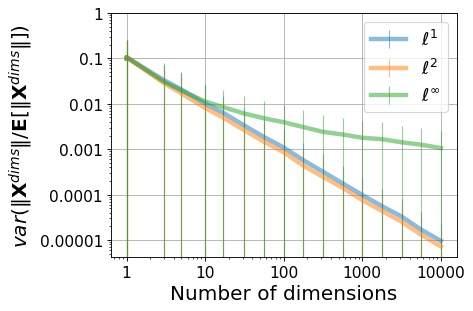

In [26]:
DIMS = np.logspace(0, 4, 17, dtype=np.int)
REPS = 3
CLUSTER = 3
res = np.zeros((REPS, len(DIMS), 3))
for r in range(REPS):
    rndm_var = np.random.rand()
    rndm_mean = 10.*np.random.randn()
    for d in range(len(DIMS)):
        X_data = np.empty((DIMS[d], 0))
        for c in range(CLUSTER):
            X_data = np.append(X_data, rndm_var*np.random.randn(DIMS[d], np.int(1000/CLUSTER)) + rndm_mean, axis=1)
        D = np.linalg.norm(X_data, ord=1, axis=0)
        res[r, d, 0] = np.var(D/np.mean(D)) # = np.var(D) / np.mean(D)**2.
        D = np.linalg.norm(X_data, ord=2, axis=0)
        res[r, d, 1] = np.var(D/np.mean(D)) # = np.var(D) / np.mean(D)**2.
        D = np.linalg.norm(X_data, ord=np.inf, axis=0)
        res[r, d, 2] = np.var(D/np.mean(D)) # = np.var(D) / np.mean(D)**2.

fig = plt.figure(figsize=(6, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.errorbar(DIMS, np.mean(res[:,:,0], axis=0), np.std(res[:,:,0], axis=0), alpha=0.5, linewidth=4, elinewidth=1)
plt.errorbar(DIMS, np.mean(res[:,:,1], axis=0), np.std(res[:,:,1], axis=0), alpha=0.5, linewidth=4, elinewidth=1)
plt.errorbar(DIMS, np.mean(res[:,:,2], axis=0), np.std(res[:,:,2], axis=0), alpha=0.5, linewidth=4, elinewidth=1)
plt.loglog()
plt.grid()
plt.xticks([1, 10, 100, 1000, 10000], [1, 10, 100, 1000, 10000], fontsize=14)
plt.yticks([0.00001, 0.0001, 0.001, 0.01, 0.1, 1], ['0.00001', 0.0001, 0.001, 0.01, 0.1, 1], fontsize=14)
plt.xlabel('Number of dimensions', fontsize=18)
plt.ylabel('$var (\Vert \mathbf{X}^{dims}\Vert / \mathbf{E}[\Vert\mathbf{X}^{dims}\Vert])$', fontsize=18)
plt.legend(['$\ell^1$', '$\ell^2$', '$\ell^\infty$'], fontsize=16) # well, L^\infty is an approximation (p=10)

fig.tight_layout()
plt.savefig('ad_high_dim_condition.pdf')

### When does it fail

Basically, Theorem 1 by Beyer et al. [1] states that if $\;lim_{d \rightarrow \infty}\; var \left( \frac{\Vert \mathbf{X}^d \Vert}{\mathbf{E}[\Vert \mathbf{X}^d \Vert]} \right) = 0$ then we can expect that 

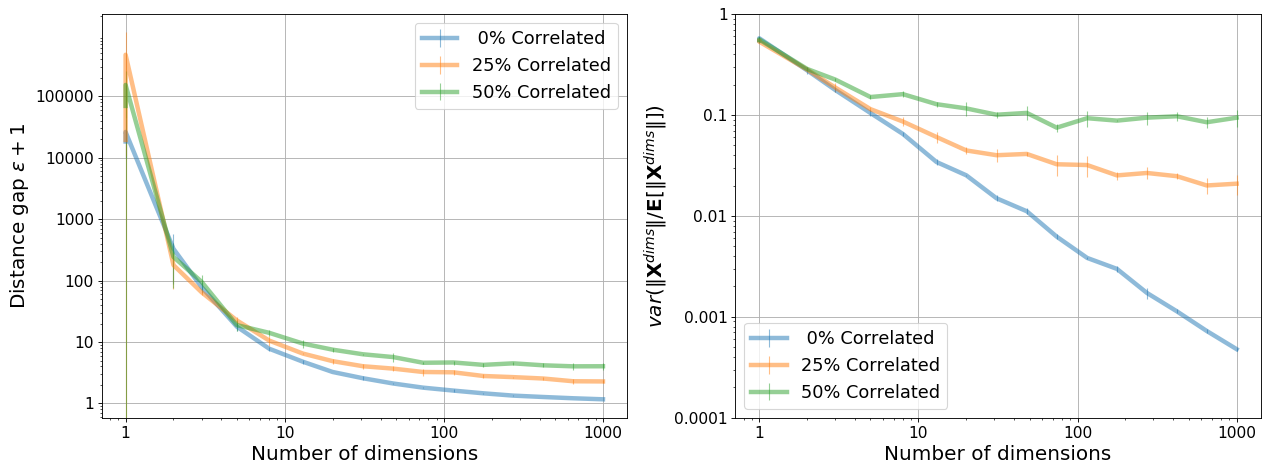

In [27]:
DIMS = np.logspace(0, 3, 17, dtype=np.int)
REPS = 3
res = np.zeros((REPS, len(DIMS), 3))
assumption = np.zeros((REPS, len(DIMS), 3))
for r in range(REPS):
    rndm_var = np.random.rand()
    for d in range(len(DIMS)):
        rndm_mean = np.zeros(DIMS[d])
        
        rndm_cov = 0.0*np.ones((DIMS[d], DIMS[d]))
        np.fill_diagonal(rndm_cov, 1.)
        X_data = np.random.multivariate_normal(rndm_mean, rndm_cov, size=100).T
        D = dist.pdist(X_data.T, metric='minkowski', p=2)
        res[r, d, 0] = np.max(D)/np.min(D)
        assumption[r, d, 0] = np.var(D/np.mean(D)) # = np.var(D) / np.mean(D)**2.

        rndm_cov = 0.25*np.ones((DIMS[d], DIMS[d]))
        np.fill_diagonal(rndm_cov, 1.)
        X_data = np.random.multivariate_normal(rndm_mean, rndm_cov, size=100).T
        D = dist.pdist(X_data.T, metric='minkowski', p=2)
        res[r, d, 1] = np.max(D)/np.min(D)
        assumption[r, d, 1] = np.var(D/np.mean(D)) # = np.var(D) / np.mean(D)**2.

        rndm_cov = 0.5*np.ones((DIMS[d], DIMS[d]))
        np.fill_diagonal(rndm_cov, 1.)
        X_data = np.random.multivariate_normal(rndm_mean, rndm_cov, size=100).T
        D = dist.pdist(X_data.T, metric='minkowski', p=2)
        res[r, d, 2] = np.max(D)/np.min(D)
        assumption[r, d, 2] = np.var(D/np.mean(D)) # = np.var(D) / np.mean(D)**2.

fig = plt.figure(figsize=(16, 6), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(1, 2, 1)
plt.errorbar(DIMS, np.mean(res[:,:,0], axis=0), np.std(res[:,:,0], axis=0), alpha=0.5, linewidth=4, elinewidth=1)
plt.errorbar(DIMS, np.mean(res[:,:,1], axis=0), np.std(res[:,:,1], axis=0), alpha=0.5, linewidth=4, elinewidth=1)
plt.errorbar(DIMS, np.mean(res[:,:,2], axis=0), np.std(res[:,:,2], axis=0), alpha=0.5, linewidth=4, elinewidth=1)
plt.loglog()
plt.grid()
plt.xticks([1, 10, 100, 1000], [1, 10, 100, 1000], fontsize=14)
plt.yticks([1, 10, 100, 1000, 10000, 100000], [1, 10, 100, 1000, 10000, 100000], fontsize=14)
plt.xlabel('Number of dimensions', fontsize=18)
plt.ylabel('Distance gap $\epsilon + 1$', fontsize=18)
plt.legend([' 0% Correlated', '25% Correlated', '50% Correlated'], fontsize=16)

plt.subplot(1, 2, 2)
plt.errorbar(DIMS, np.mean(assumption[:,:,0], axis=0), np.std(assumption[:,:,0], axis=0), alpha=0.5, linewidth=4, elinewidth=1)
plt.errorbar(DIMS, np.mean(assumption[:,:,1], axis=0), np.std(assumption[:,:,1], axis=0), alpha=0.5, linewidth=4, elinewidth=1)
plt.errorbar(DIMS, np.mean(assumption[:,:,2], axis=0), np.std(assumption[:,:,2], axis=0), alpha=0.5, linewidth=4, elinewidth=1)
plt.loglog()
plt.grid()
plt.xticks([1, 10, 100, 1000], [1, 10, 100, 1000], fontsize=14)
plt.yticks([0.0001, 0.001, 0.01, 0.1, 1], [0.0001, 0.001, 0.01, 0.1, 1], fontsize=14)
plt.xlabel('Number of dimensions', fontsize=18)
plt.ylabel('$var (\Vert \mathbf{X}^{dims}\Vert / \mathbf{E}[\Vert\mathbf{X}^{dims}\Vert])$', fontsize=18)
plt.legend([' 0% Correlated', '25% Correlated', '50% Correlated'], fontsize=16, loc=3) # well, L^\infty is an approximation (p=10)

fig.tight_layout()
plt.savefig('ad_high_dim_correlation.pdf')

### Summary

For zero percent correlation, we see the same behavior as before. However, when correlation become more and more prevalent, the distance gap woun't disappear as the condition is not fullfilled anymore. Still, a considerably impact of the dimensionality on the distances can be seen from both graphs.


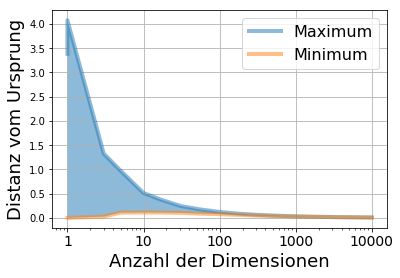

In [44]:
DIMS = np.logspace(0, 4, 17, dtype=np.int)
res = np.zeros((len(DIMS), 2))
for d in range(len(DIMS)):
    X_data = np.random.randn(DIMS[d], 1000)
    norms = np.linalg.norm(X_data, axis=0)
    res[d, :] = np.max(norms) / DIMS[d], np.min(norms) / DIMS[d]
            

fig = plt.figure(figsize=(6, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.figure()
plt.fill_between(DIMS, res[:,0], res[:,1], alpha=0.5, linewidth=4)
plt.plot(DIMS, res[:,0], alpha=0.5, linewidth=4)
plt.plot(DIMS, res[:,1], alpha=0.5, linewidth=4)
plt.semilogx()
plt.grid()
plt.xticks([1, 10, 100, 1000, 10000], [1, 10, 100, 1000, 10000], fontsize=14)
# plt.yticks([0.00001, 0.0001, 0.001, 0.01, 0.1, 1], ['0.00001', 0.0001, 0.001, 0.01, 0.1, 1], fontsize=14)
plt.xlabel('Anzahl der Dimensionen', fontsize=18)
plt.ylabel('Distanz vom Ursprung', fontsize=18)
plt.legend(['Maximum', 'Minimum'], fontsize=16) # well, L^\infty is an approximation (p=10)

fig.tight_layout()